In [13]:
#Convolutional Neural Network on MNIST handwritten digit dataset

In [49]:
import tensorflow as tf

In [15]:
#Importing librairies

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#Importing the data
data1_train = pd.read_csv('Data/mnist_train.csv')
data1_test = pd.read_csv('Data/mnist_test.csv')

In [17]:
#Preprocessing

#Reshaping into 28x28 array
data1_train.iloc[3,1:].values.reshape(28, 28).astype('uint8')
data1_test.iloc[3,1:].values.reshape(28, 28).astype('uint8')

#Storing Pixel array in form length width and channel in x1_train and x1_test
x1_train = data1_train.iloc[:,1:].values.reshape(len(data1_train), 28, 28, 1)
x1_test = data1_test.iloc[:,1:].values.reshape(len(data1_test), 28, 28, 1)

#Storing the labels in y1_train and y1_test 
y1_train = data1_train.iloc[:,0].values
y1_test = data1_test.iloc[:,0].values

y1 = y1_test

#Converting labels to categorical features

y1_train = tf.keras.utils.to_categorical(y1_train, num_classes = 10)
y1_test = tf.keras.utils.to_categorical(y1_test, num_classes = 10)

In [18]:
#Another way to do it

(x2_train, y2_train), (x2_test, y2_test) = keras.datasets.mnist.load_data()

x2_train = x2_train.reshape(-1,28,28,1)
x2_test  = x2_test.reshape(-1,28,28,1)

#Converting labels to categorical features

y2_train = tf.keras.utils.to_categorical(y2_train, num_classes = 10)
y2_test = tf.keras.utils.to_categorical(y2_test, num_classes = 10)

In [19]:
#Data
data1_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Label before categorical
y1

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
#Label after categorical
y1_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
print('\033[1m' + "Preprocessing  : first method" + '\033[0m' )
print("x1_train : ",x1_train.shape)
print("y1_train : ",y1_train.shape)
print("x1_test  : ",x1_test.shape)
print("y1_test  : ",y1_test.shape)

print('\n' + '\033[1m' + "Preprocessing  : second method" + '\033[0m')
print("x2_train : ",x2_train.shape)
print("y2_train : ",y2_train.shape)
print("x2_test  : ",x2_test.shape)
print("y2_test  : ",y2_test.shape)

Preprocessing  : first method
x1_train :  (60000, 28, 28, 1)
y1_train :  (60000, 10)
x1_test  :  (10000, 28, 28, 1)
y1_test  :  (10000, 10)

Preprocessing  : second method
x2_train :  (60000, 28, 28, 1)
y2_train :  (60000, 10)
x2_test  :  (10000, 28, 28, 1)
y2_test  :  (10000, 10)


In [34]:
#CNN model
model = Sequential()

model.add(Convolution2D(32, 3, data_format='channels_last', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [25]:
#Fitting

nb_epoch = 5
batch_size = 5

result = model.fit(x1_train, y1_train, batch_size = batch_size, epochs = nb_epoch, validation_data = (x1_test, y1_test))

Epoch 1/5
12000/12000 [==============================] - 72s 6ms/step - loss: 29.1768 - accuracy: 0.3838 - val_loss: 5.3294 - val_accuracy: 0.7674
Epoch 2/5
12000/12000 [==============================] - 70s 6ms/step - loss: 11.3351 - accuracy: 0.6343 - val_loss: 3.6318 - val_accuracy: 0.8385
Epoch 3/5
12000/12000 [==============================] - 70s 6ms/step - loss: 8.3633 - accuracy: 0.7068 - val_loss: 3.0269 - val_accuracy: 0.8677
Epoch 4/5
12000/12000 [==============================] - 70s 6ms/step - loss: 7.0211 - accuracy: 0.7465 - val_loss: 2.7126 - val_accuracy: 0.8808
Epoch 5/5
12000/12000 [==============================] - 72s 6ms/step - loss: 6.1667 - accuracy: 0.7680 - val_loss: 2.4804 - val_accuracy: 0.8908


In [26]:
#Poor performances

score = model.evaluate(x1_test, y1_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 2.4804
Test accuracy : 0.8908


In [27]:
dfMetrics = pd.DataFrame(result.history)
dfMetrics

,loss,accuracy,val_loss,val_accuracy
0,29.176805,0.383833,5.329431,0.7674
1,11.335057,0.634317,3.631761,0.8385
2,8.363284,0.706800,3.026928,0.8677
3,7.021073,0.746500,2.712647,0.8808
4,6.166652,0.767983,2.480361,0.8908


Text(0, 0.5, 'accuracy')

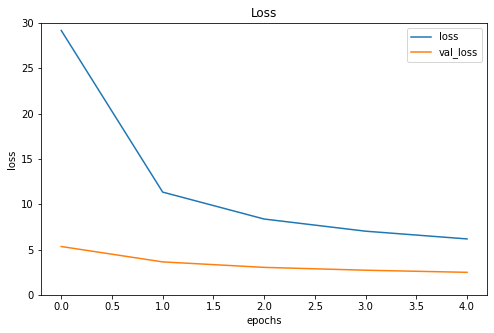

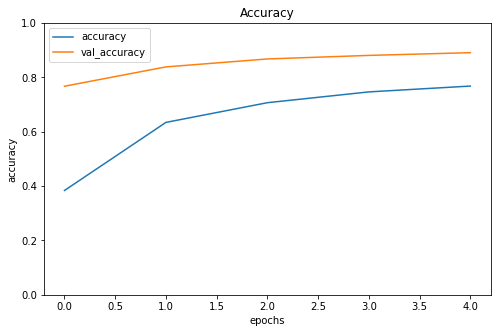

In [28]:
figure = dfMetrics.plot(y=["loss", "val_loss"], title = "Loss", label=["loss", "val_loss"], figsize=(8,5), ylim=(0,30))

figure.set_xlabel('epochs')
figure.set_ylabel('loss')


figure2 = dfMetrics.plot(y= ["accuracy", "val_accuracy"], title = "Accuracy", label=["accuracy", "val_accuracy"],figsize=(8,5), ylim=(0,1))

figure2.set_xlabel('epochs')
figure2.set_ylabel('accuracy')


In [30]:
#New try increasing the number of batches

#Fitting

nb_epoch = 5
batch_size = 500

result2 = model.fit(x1_train, y1_train, batch_size = batch_size, epochs = nb_epoch, validation_data = (x1_test, y1_test))

Epoch 1/5
120/120 [==============================] - 13s 104ms/step - loss: 69.8241 - accuracy: 0.1128 - val_loss: 32.6402 - val_accuracy: 0.1546
Epoch 2/5
120/120 [==============================] - 12s 102ms/step - loss: 53.6346 - accuracy: 0.1506 - val_loss: 21.4286 - val_accuracy: 0.2403
Epoch 3/5
120/120 [==============================] - 12s 103ms/step - loss: 43.4030 - accuracy: 0.2006 - val_loss: 15.2874 - val_accuracy: 0.3665
Epoch 4/5
120/120 [==============================] - 12s 102ms/step - loss: 35.7726 - accuracy: 0.2569 - val_loss: 11.4753 - val_accuracy: 0.4818
Epoch 5/5
120/120 [==============================] - 12s 101ms/step - loss: 29.7029 - accuracy: 0.3144 - val_loss: 8.9458 - val_accuracy: 0.5665


In [31]:
#Performances

score2 = model.evaluate(x1_test, y1_test, verbose=0)

print(f'Test loss     : {score2[0]:4.4f}')
print(f'Test accuracy : {score2[1]:4.4f}')

Test loss     : 8.9458
Test accuracy : 0.5665


In [32]:
dfMetrics2 = pd.DataFrame(result2.history)
dfMetrics2

,loss,accuracy,val_loss,val_accuracy
0,69.824135,0.112800,32.640247,0.1546
1,53.634575,0.150617,21.428555,0.2403
2,43.403011,0.200633,15.287435,0.3665
3,35.772591,0.256950,11.475317,0.4818
4,29.702900,0.314350,8.945794,0.5665


Text(0, 0.5, 'accuracy')

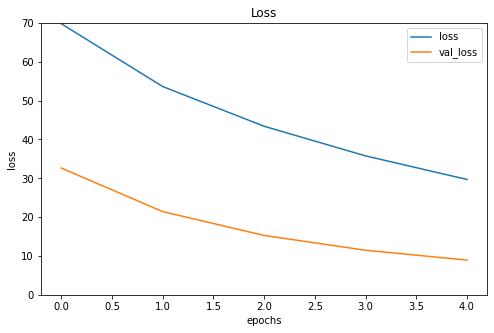

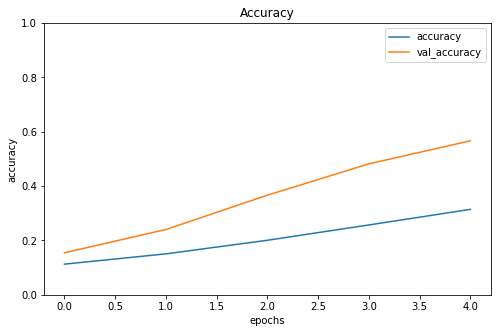

In [33]:
figure = dfMetrics2.plot(y=["loss", "val_loss"], title = "Loss", label=["loss", "val_loss"], figsize=(8,5), ylim=(0,70))

figure.set_xlabel('epochs')
figure.set_ylabel('loss')


figure2 = dfMetrics2.plot(y= ["accuracy", "val_accuracy"], title = "Accuracy", label=["accuracy", "val_accuracy"],figsize=(8,5), ylim=(0,1))

figure2.set_xlabel('epochs')
figure2.set_ylabel('accuracy')


In [35]:
#New try increasing the number of epochs

#Fitting

nb_epoch = 15
batch_size = 500

result3 = model.fit(x1_train, y1_train, batch_size = batch_size, epochs = nb_epoch, validation_data = (x1_test, y1_test))

Epoch 1/15
120/120 [==============================] - 13s 103ms/step - loss: 59.1655 - accuracy: 0.1049 - val_loss: 29.0465 - val_accuracy: 0.1169
Epoch 2/15
120/120 [==============================] - 12s 103ms/step - loss: 46.6158 - accuracy: 0.1433 - val_loss: 19.6800 - val_accuracy: 0.2164
Epoch 3/15
120/120 [==============================] - 12s 101ms/step - loss: 37.7330 - accuracy: 0.1987 - val_loss: 14.2136 - val_accuracy: 0.3374
Epoch 4/15
120/120 [==============================] - 12s 101ms/step - loss: 31.4023 - accuracy: 0.2535 - val_loss: 10.7324 - val_accuracy: 0.4585
Epoch 5/15
120/120 [==============================] - 12s 101ms/step - loss: 26.0710 - accuracy: 0.3135 - val_loss: 8.4481 - val_accuracy: 0.5544
Epoch 6/15
120/120 [==============================] - 12s 103ms/step - loss: 21.7652 - accuracy: 0.3724 - val_loss: 6.9612 - val_accuracy: 0.6236
Epoch 7/15
120/120 [==============================] - 12s 101ms/step - loss: 18.6875 - accuracy: 0.4210 - val_loss: 5.91

In [36]:
#Performances

score3 = model.evaluate(x1_test, y1_test, verbose=0)

print(f'Test loss     : {score3[0]:4.4f}')
print(f'Test accuracy : {score3[1]:4.4f}')

Test loss     : 2.9615
Test accuracy : 0.8328


In [37]:
dfMetrics3 = pd.DataFrame(result3.history)
dfMetrics3

,loss,accuracy,val_loss,val_accuracy
0,59.165546,0.104867,29.046453,0.1169
1,46.615837,0.143283,19.679966,0.2164
2,37.732994,0.198733,14.213556,0.3374
3,31.402290,0.253483,10.732437,0.4585
4,26.071049,0.313483,8.448111,0.5544
5,21.765169,0.372450,6.961237,0.6236
6,18.687550,0.421017,5.916266,0.6769
7,16.340406,0.467150,5.159612,0.7118
8,14.359927,0.507600,4.615309,0.7410
9,12.843950,0.545750,4.186457,0.7644


Text(0, 0.5, 'accuracy')

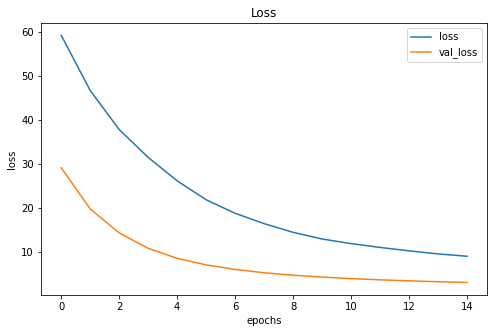

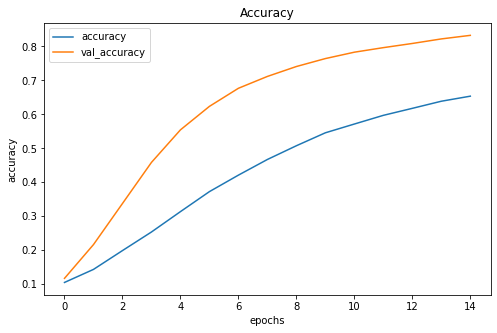

In [38]:
figure = dfMetrics3.plot(y=["loss", "val_loss"], title = "Loss", label=["loss", "val_loss"], figsize=(8,5))

figure.set_xlabel('epochs')
figure.set_ylabel('loss')


figure2 = dfMetrics3.plot(y= ["accuracy", "val_accuracy"], title = "Accuracy", label=["accuracy", "val_accuracy"],figsize=(8,5))

figure2.set_xlabel('epochs')
figure2.set_ylabel('accuracy')

Better performances, but still not as good as I want

In [39]:
#New try with a new model

In [42]:
model = Sequential()

model.add( keras.layers.Input((28,28,1)) )

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 8)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 16)         

In [44]:
#Fitting

nb_epoch = 18
batch_size = 500

result4 = model.fit(x1_train, y1_train, batch_size = batch_size, epochs = nb_epoch, verbose = 1, validation_data = (x1_test, y1_test))

Epoch 1/18
120/120 [==============================] - 7s 56ms/step - loss: 9.8084 - accuracy: 0.1968 - val_loss: 1.9618 - val_accuracy: 0.2821
Epoch 2/18
120/120 [==============================] - 7s 55ms/step - loss: 2.0629 - accuracy: 0.2474 - val_loss: 1.7273 - val_accuracy: 0.3938
Epoch 3/18
120/120 [==============================] - 7s 56ms/step - loss: 1.8991 - accuracy: 0.3178 - val_loss: 1.3948 - val_accuracy: 0.5267
Epoch 4/18
120/120 [==============================] - 7s 56ms/step - loss: 1.6761 - accuracy: 0.4124 - val_loss: 1.0050 - val_accuracy: 0.6912
Epoch 5/18
120/120 [==============================] - 7s 55ms/step - loss: 1.4374 - accuracy: 0.5180 - val_loss: 0.7368 - val_accuracy: 0.8116
Epoch 6/18
120/120 [==============================] - 7s 54ms/step - loss: 1.2438 - accuracy: 0.5789 - val_loss: 0.6144 - val_accuracy: 0.8325
Epoch 7/18
120/120 [==============================] - 7s 55ms/step - loss: 1.1057 - accuracy: 0.6238 - val_loss: 0.4848 - val_accuracy: 0.8978

In [45]:
#Performances

score4 = model.evaluate(x1_test, y1_test, verbose=0)

print(f'Test loss     : {score4[0]:4.4f}')
print(f'Test accuracy : {score4[1]:4.4f}')

Test loss     : 0.1018
Test accuracy : 0.9713


In [46]:
dfMetrics4 = pd.DataFrame(result4.history)
dfMetrics4

,loss,accuracy,val_loss,val_accuracy
0,9.808432,0.196750,1.961783,0.2821
1,2.062944,0.247417,1.727258,0.3938
2,1.899135,0.317767,1.394762,0.5267
3,1.676139,0.412450,1.005014,0.6912
4,1.437399,0.518033,0.736847,0.8116
5,1.243769,0.578933,0.614358,0.8325
6,1.105715,0.623817,0.484845,0.8978
7,0.957727,0.683283,0.353355,0.9276
8,0.848598,0.724683,0.289186,0.9387
9,0.754048,0.755483,0.223046,0.9458


Text(0, 0.5, 'accuracy')

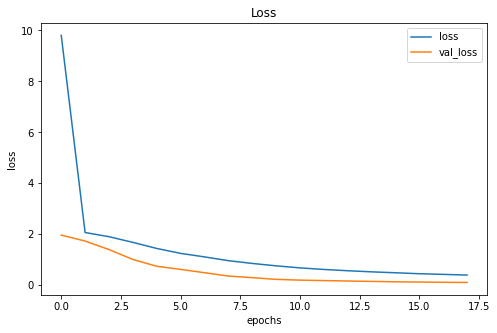

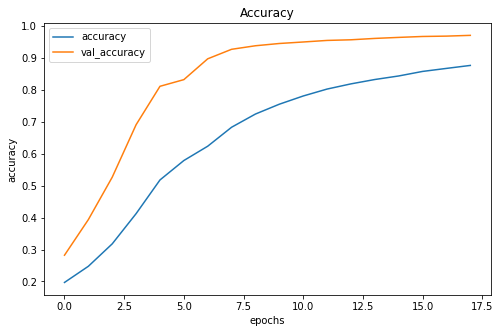

In [47]:
figure = dfMetrics4.plot(y=["loss", "val_loss"], title = "Loss", label=["loss", "val_loss"], figsize=(8,5))

figure.set_xlabel('epochs')
figure.set_ylabel('loss')


figure2 = dfMetrics4.plot(y= ["accuracy", "val_accuracy"], title = "Accuracy", label=["accuracy", "val_accuracy"],figsize=(8,5))

figure2.set_xlabel('epochs')
figure2.set_ylabel('accuracy')